# LYN Summary

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None) # show entire column contents, important!
from IPython.display import HTML, display
import hpotk
from hpotk.ontology import Ontology
from hpotk.ontology.load.obographs import load_ontology
from pyphetools.creation import AllelicRequirement
from pyphetools.visualization import *
import importlib.metadata
__version__ = importlib.metadata.version("pyphetools")
print(f"Using pyphetools version {__version__}")

Using pyphetools version 0.9.39


In [2]:
hpo: Ontology = load_ontology('../hp.json')
ingestor = PhenopacketIngestor(indir="phenopackets")

[pyphetools] Ingested 4 GA4GH phenopackets.


In [3]:
ppkt_d = ingestor.get_phenopacket_dictionary()
ppkt_list = list(ppkt_d.values())
detailed_table = DetailedSupplTable(patient_d=ppkt_d, hp_ontology=hpo)
display(HTML(detailed_table.get_html_table_by_pmid(min_count=1)))

HPO term,PMID:36932076,PMID:36122175
Elevated circulating C-reactive protein concentration (HP:0011227),3/3 (100.0%),1/1 (100.0%)
Abdominal pain (HP:0002027),2/3 (66.7%),1/1 (100.0%)
Fever (HP:0001945),2/3 (66.7%),1/1 (100.0%)
Purpura (HP:0000979),3/3 (100.0%),0/1 (0.0%)
Intrauterine growth retardation (HP:0001511),1/3 (33.3%),1/1 (100.0%)
Small vessel vasculitis (HP:0011944),2/3 (66.7%),0/1 (0.0%)
Hepatic fibrosis (HP:0001395),2/3 (66.7%),0/1 (0.0%)
Elevated gamma-glutamyltransferase level (HP:0030948),2/3 (66.7%),0/1 (0.0%)
Arthralgia (HP:0002829),2/3 (66.7%),0/1 (0.0%)
Colitis (HP:0002583),2/3 (66.7%),0/1 (0.0%)


In [4]:
pcharts = PhenopacketCharts(indir="phenopackets")

[pyphetools] Ingested 4 GA4GH phenopackets.


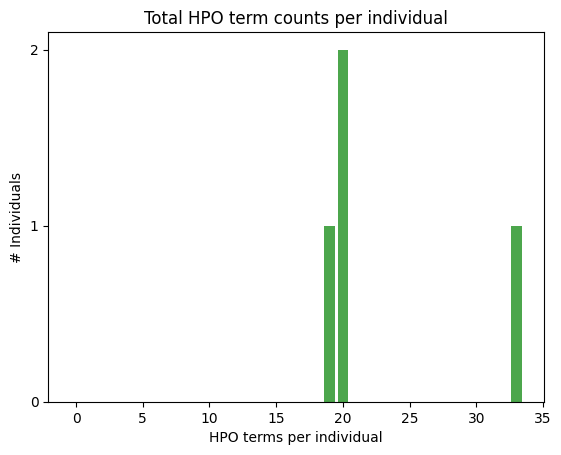

In [5]:
pcharts.terms_per_phenopacket();

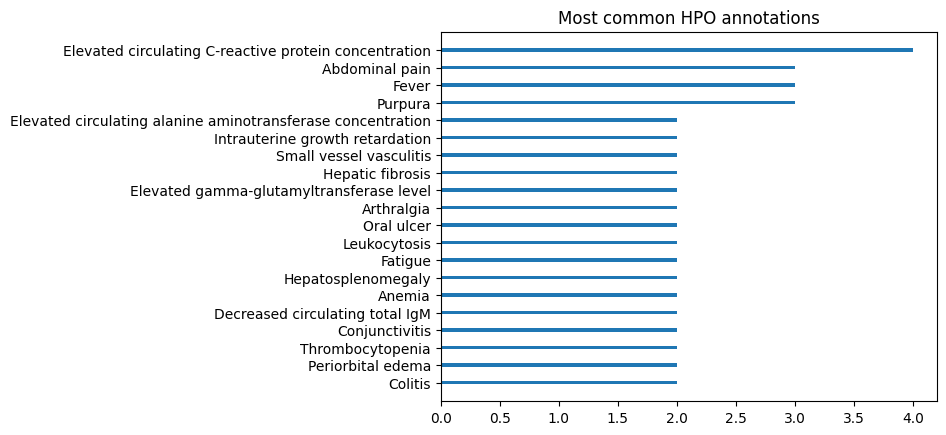

In [6]:
 pcharts.most_common_hpo_terms(20);

In [7]:
hpoa_creatr = HpoaTableBuilder(phenopacket_list=ppkt_list).neonatal_onset("PMID:36932076", 3,3).neonatal_onset("PMID:36122175",1,1).build()

We found a total of 55 unique HPO terms
Extracted disease: Autoinflammatory disease, systemic, with vasculitis (OMIM:620376)


In [8]:
df = hpoa_creatr.get_dataframe()
df.head(100)

,#diseaseID,diseaseName,phenotypeID,phenotypeName,onsetID,onsetName,frequency,sex,negation,modifier,description,publication,evidence,biocuration
0,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0004970,Ascending tubular aorta aneurysm,,,1/1,,,,,PMID:36122175,PCS,ORCID:0000-0002-0736-9199
1,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0001640,Cardiomegaly,,,1/1,,,,,PMID:36122175,PCS,ORCID:0000-0002-0736-9199
2,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0001396,Cholestasis,,,1/1,,,,,PMID:36122175,PCS,ORCID:0000-0002-0736-9199
3,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0006559,Hepatic calcification,,,1/1,,,,,PMID:36122175,PCS,ORCID:0000-0002-0736-9199
4,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0002240,Hepatomegaly,,,1/1,,,,,PMID:36122175,PCS,ORCID:0000-0002-0736-9199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:4000037,Congenital hydrocele,,,1/1,,,,,PMID:36932076,PCS,ORCID:0000-0002-0736-9199
57,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0002908,Conjugated hyperbilirubinemia,,,1/1,,,,,PMID:36932076,PCS,ORCID:0000-0002-0736-9199
58,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0010783,Erythema,,,1/1,,,,,PMID:36932076,PCS,ORCID:0000-0002-0736-9199
59,OMIM:620376,"Autoinflammatory disease, systemic, with vasculitis",HP:0003623,Neonatal onset,,,3/3,,,,,PMID:36932076,PCS,ORCID:0000-0002-0736-9199


In [9]:
hpoa_creatr.write_data_frame()

Wrote HPOA disease file to OMIM-620376.tab
